# Analysis of 911 Calls Data
___

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

I will focus on the exploratory data analysis and visualization to see whether there's any trend for 911 calls in geographic pattern and time span.

## Data and Setup

- Imports

In [4]:
import numpy as np
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [ ]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

- Read in the csv file as a dataframe called df

In [6]:
df = pd.read_csv("911.csv")

- Check the info() of the df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


- Check the head of df

In [128]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## EDA
In this section, I will explore the variables in df individually to find interesting trends.

### Geographic pattern

- Zipcodes

In [31]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top 5 zipcodes for 911 calls are 19401, 19464, 19403, 19446 and 19406.

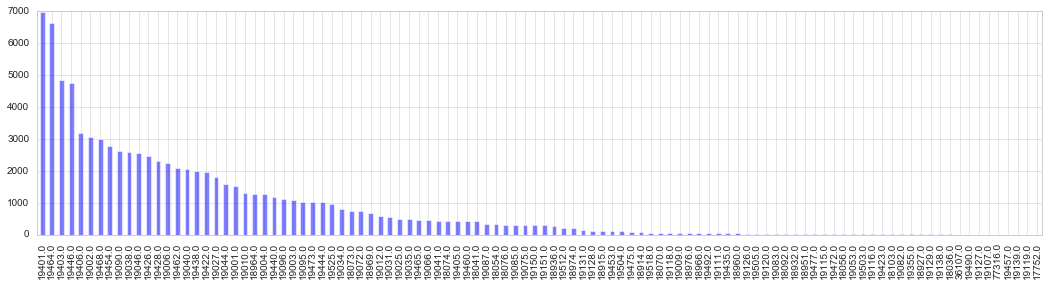

In [34]:
df['zip'].value_counts().plot(kind='bar', alpha=0.5, figsize=(18,4))

The first four zipcodes have significantly more 911 calls than others.

- Townships (twp)

In [35]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

The top 5 townships (twp) for 911 calls are Lower Merion, Abington, Norristown, Upper Merion and Cheltenham. And Lower Merion has much more 911 calls than others.

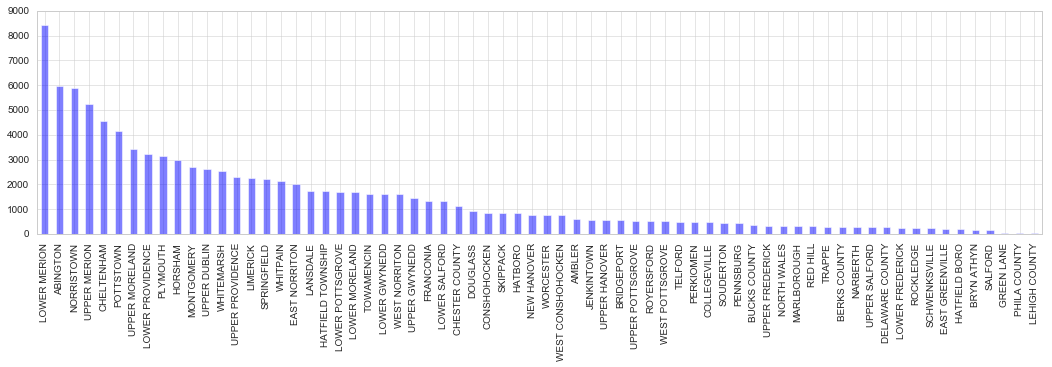

In [36]:
df['twp'].value_counts().plot(kind='bar', alpha=0.5, figsize=(18,4))

The distribution is similar to zipcodes, since township and zipcodes are highly correlated with each other and they present parallel information.

In [15]:
df['addr'].value_counts().head(5)

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: addr, dtype: int64

The top 5 address for 911 calls are listes above and notice that Shannondell dr & Shannondell blvd has almost three times as many 911 calls as other addresses.

In [38]:
df['addr'].nunique()

21914

### Reasons

- *title*

Take a look at the *title* column to find how many unique title codes there are.

In [26]:
df['title'].nunique()

110

There are 110 distinct titles in total.

- Create new features: *Reason*

In the *titles* column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called *Reason* to specify them.

In [49]:
df['Reason'] = df['title'].apply(lambda x: x.split(":")[0])

- Check the most common Reason for a 911 call

In [52]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

The most common reason is EMS.

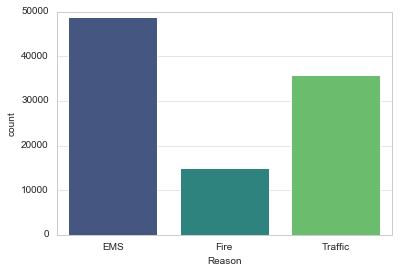

In [62]:
sns.countplot(df['Reason'], palette='viridis')

### Time pattern

Now let us begin to focus on time information. 
- Check the data type of the objects in the *timeStamp* column

In [122]:
type(df['timeStamp'].iloc[0])

str

- Convert the column from strings to DateTime objects

In [53]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

- Create new columns called Hour, Month, and Day of Week

In [57]:
time = df['timeStamp'].iloc[0]
print("hour: {} \nmonth: {} \nday of week: {}".format(time.hour, time.month, time.dayofweek))

hour: 17 
month: 12 
day of week: 3


In [58]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

#### Day of Week

Notice that the *Day of Week* is an integer 0-6. Let's map the actual string names to the day of the week.

In [59]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [60]:
df['Day of week'] = df['Day of week'].map(dmap)

In [61]:
df['Day of week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of week, dtype: object

- Create a countplot of the *Day of Week* grouped by *Reason*

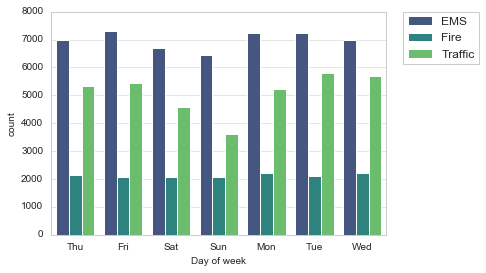

In [64]:
sns.countplot(x='Day of week', data=df, hue = 'Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

EMS is the most common reason for every day of the week. And the numbers of 911 calls are pretty stable across the week for the reason Fire which are around 2000.

#### Month

- Create a countplot of the *Month* grouped by *Reason*

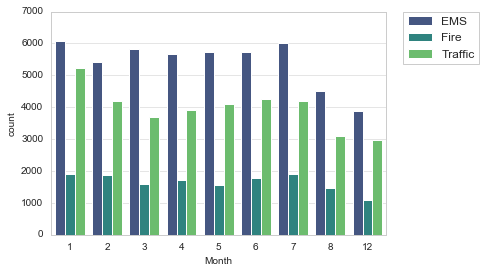

In [65]:
sns.countplot(x='Month', data=df, hue = 'Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The plot reveals that the data for month 9, 10, 11 were missing. Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

In [66]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


- Create a simple plot indicating the count of calls per month

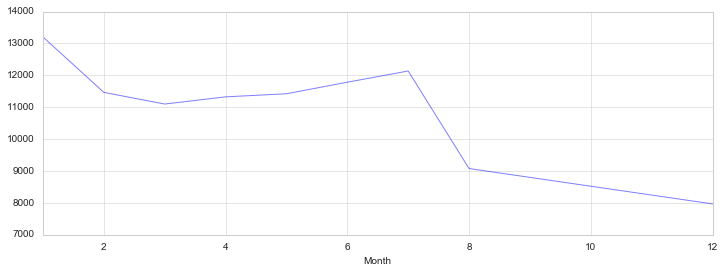

In [81]:
byMonth['desc'].plot(figsize=(12,4), alpha=0.5)

The number of 911 calls is generally more during the first half year especially for Januray and July.

- Create a linear fit on the number of calls per month

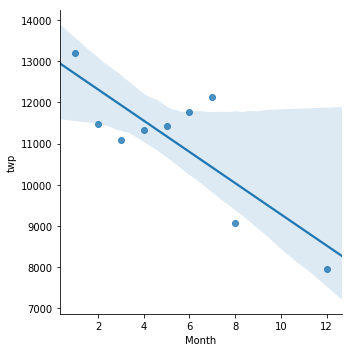

In [80]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

The number of calls decreases as from Januray to December.

#### Date

- Create a new column called *Date*

In [70]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

- Create a plot of counts of 911 calls grouped by *Date*

In [71]:
byDate = df.groupby('Date').count()

In [73]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


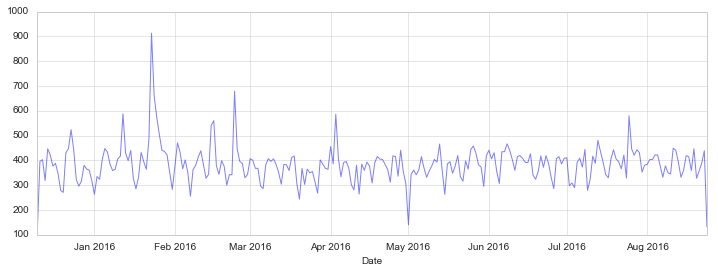

In [77]:
byDate['desc'].plot(figsize=(12,4), alpha=0.5)

- Recreate this plot but create 3 separate plots with each plot representing a reason for the 911 call

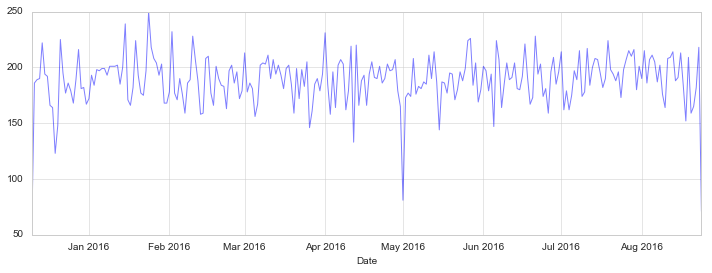

In [78]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot(figsize=(12,4), alpha=0.5)

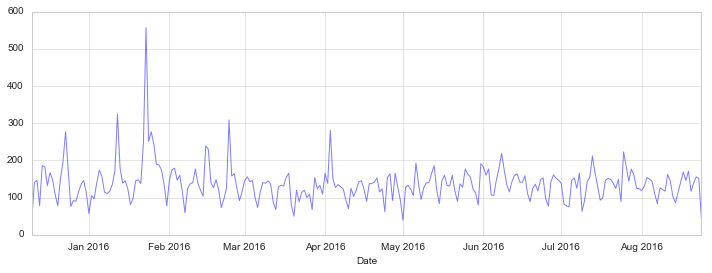

In [79]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot(figsize=(12,4), alpha=0.5)

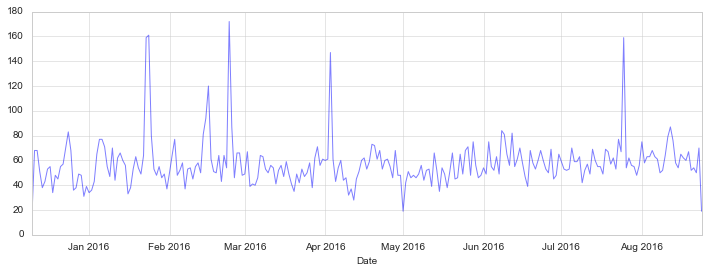

In [80]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot(figsize=(12,4), alpha=0.5)

### Interaction Effect

#### Day & Hour

In [138]:
DayHour = df.groupby(by=['Day of week', 'Hour']).count()['Reason'].unstack()
DayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


- Create a HeatMap

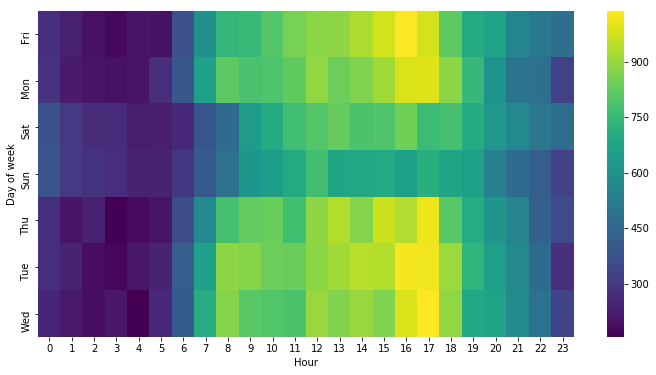

In [145]:
plt.figure(figsize=(12,6))
sns.heatmap(data=DayHour, cmap='viridis')

It seems that for weekdays, 16:00 -- 17:00 is the time of the day when we recieve most 911 calls. The number of 911 calls is significantly decreased during the weekend.

- Create a clustermap

<Figure size 864x432 with 0 Axes>

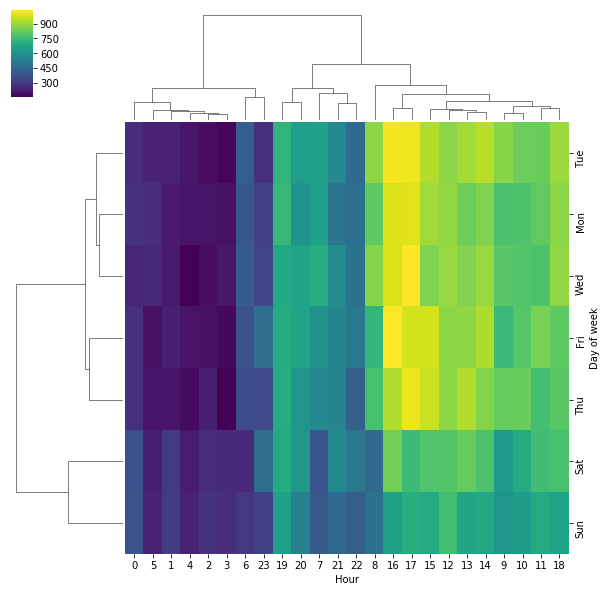

In [146]:
plt.figure(figsize=(12,6))
sns.clustermap(data=DayHour, cmap='viridis')

Overall speaking, time between 23:00 and 6:00 of the next day is clustered together and rest of the time have similar pattern. As for day of week, same as what we discussed above, Sunday and Saturday share parallel trend.

#### Day & Month

In [147]:
DayMonth = df.groupby(by=['Day of week', 'Month']).count()['Reason'].unstack()
DayMonth

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


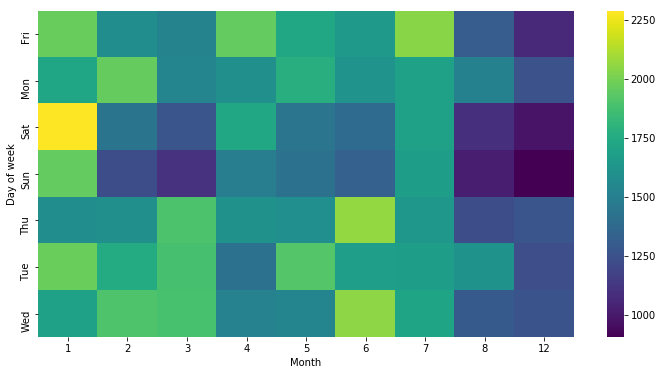

In [148]:
plt.figure(figsize=(12,6))
sns.heatmap(data=DayMonth, cmap='viridis')

Interesting to see that the most frequentist time to receive the 911 calls over the whole year is the Saturdays of January. 

<Figure size 864x432 with 0 Axes>

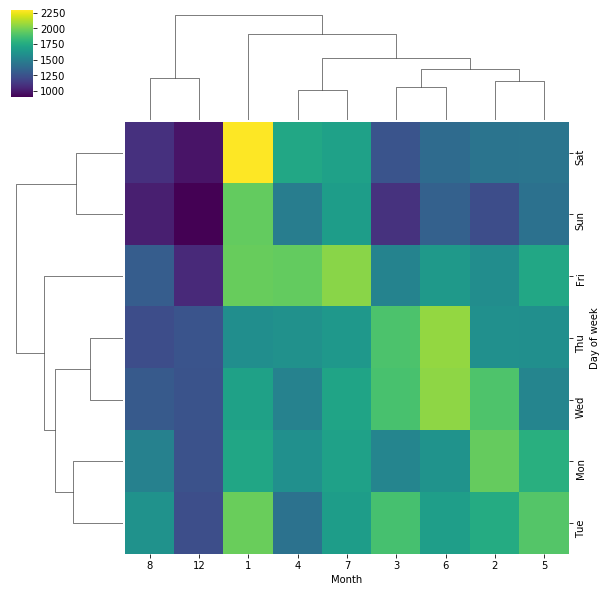

In [149]:
plt.figure(figsize=(12,6))
sns.clustermap(data=DayMonth, cmap='viridis')

Same as before, Saturday and Sunday have similar pattern. And August and December are clustered together while other months are similar to each other in terms of the number of 911 calls.

## REFERENCE
- Udemy course: Python for Machine Learning and Data Science Bootcamp